# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
# Core Python libraries for basic operations and data manipulation
import os  # Interface with the underlying operating system
import numpy as np  # Support for large, multi-dimensional arrays and matrices
import pandas as pd  # Data manipulation and analysis
import math  # Provides access to mathematical functions

# Visualization libraries for plotting and visual data exploration
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns  # Statistical data visualization based on matplotlib

# Image processing library
import cv2  # OpenCV for working with images (loading, transforming)

# TensorFlow and Keras for building and training neural network models
import tensorflow as tf  # Core library for machine learning and neural networks
from tensorflow.keras.models import Sequential  # Sequential model API for linear stacking of layers
from tensorflow.keras.layers import (
    Dense,  # Fully connected layer
    Dropout,  # Dropout layer for regularization
    Flatten,  # Flatten layer for converting matrices to vectors
    Conv2D,  # 2D Convolutional layer
    MaxPooling2D,  # Max Pooling layer for downsampling
    BatchNormalization,  # Batch Normalization for accelerating training
)
from tensorflow.keras.optimizers import Adam, SGD  # Optimization algorithms
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation
from tensorflow.keras.preprocessing.image import load_img  # Loading images
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Callback for reducing learning rate

# Scikit-learn for preprocessing and model evaluation
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import confusion_matrix  # Compute confusion matrix to evaluate classification accuracy
from sklearn.preprocessing import LabelBinarizer  # Convert labels to binary class matrix

# Miscellaneous utilities
import random  # Generating random numbers for various operations
import warnings  # Suppressing warnings for cleaner notebook output
warnings.filterwarnings("ignore")  # Ignore warnings to clean up output cells



## Loading the dataset

In [ ]:
# Integration with Google Colab for accessing files on Google Drive (specific to Colab environment)
from google.colab import drive  # Mount Google drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

In [ ]:
# Load the data
images_path = '/content/drive/MyDrive/Colab_Notebooks/Scripts/Project 8 - Computer Vision/images.npy'
labels_path = '/content/drive/MyDrive/Colab_Notebooks/Scripts/Project 8 - Computer Vision/Labels.csv'

# Loading images and labels
images = np.load(images_path)
labels = pd.read_csv(labels_path)

# Displaying the shape of the dataset
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Display the first few rows of the labels dataframe
print(labels.head())

Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)
                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


The dataset comprises 4750 images, each with a resolution of 128x128 pixels and 3 color channels (RGB), indicating a substantial amount of visual data for model training. Correspondingly, there are 4750 labels, reflecting a one-to-one relationship between images and their categorical labels, essential for a supervised learning task.


## Exploratory Data Analysis

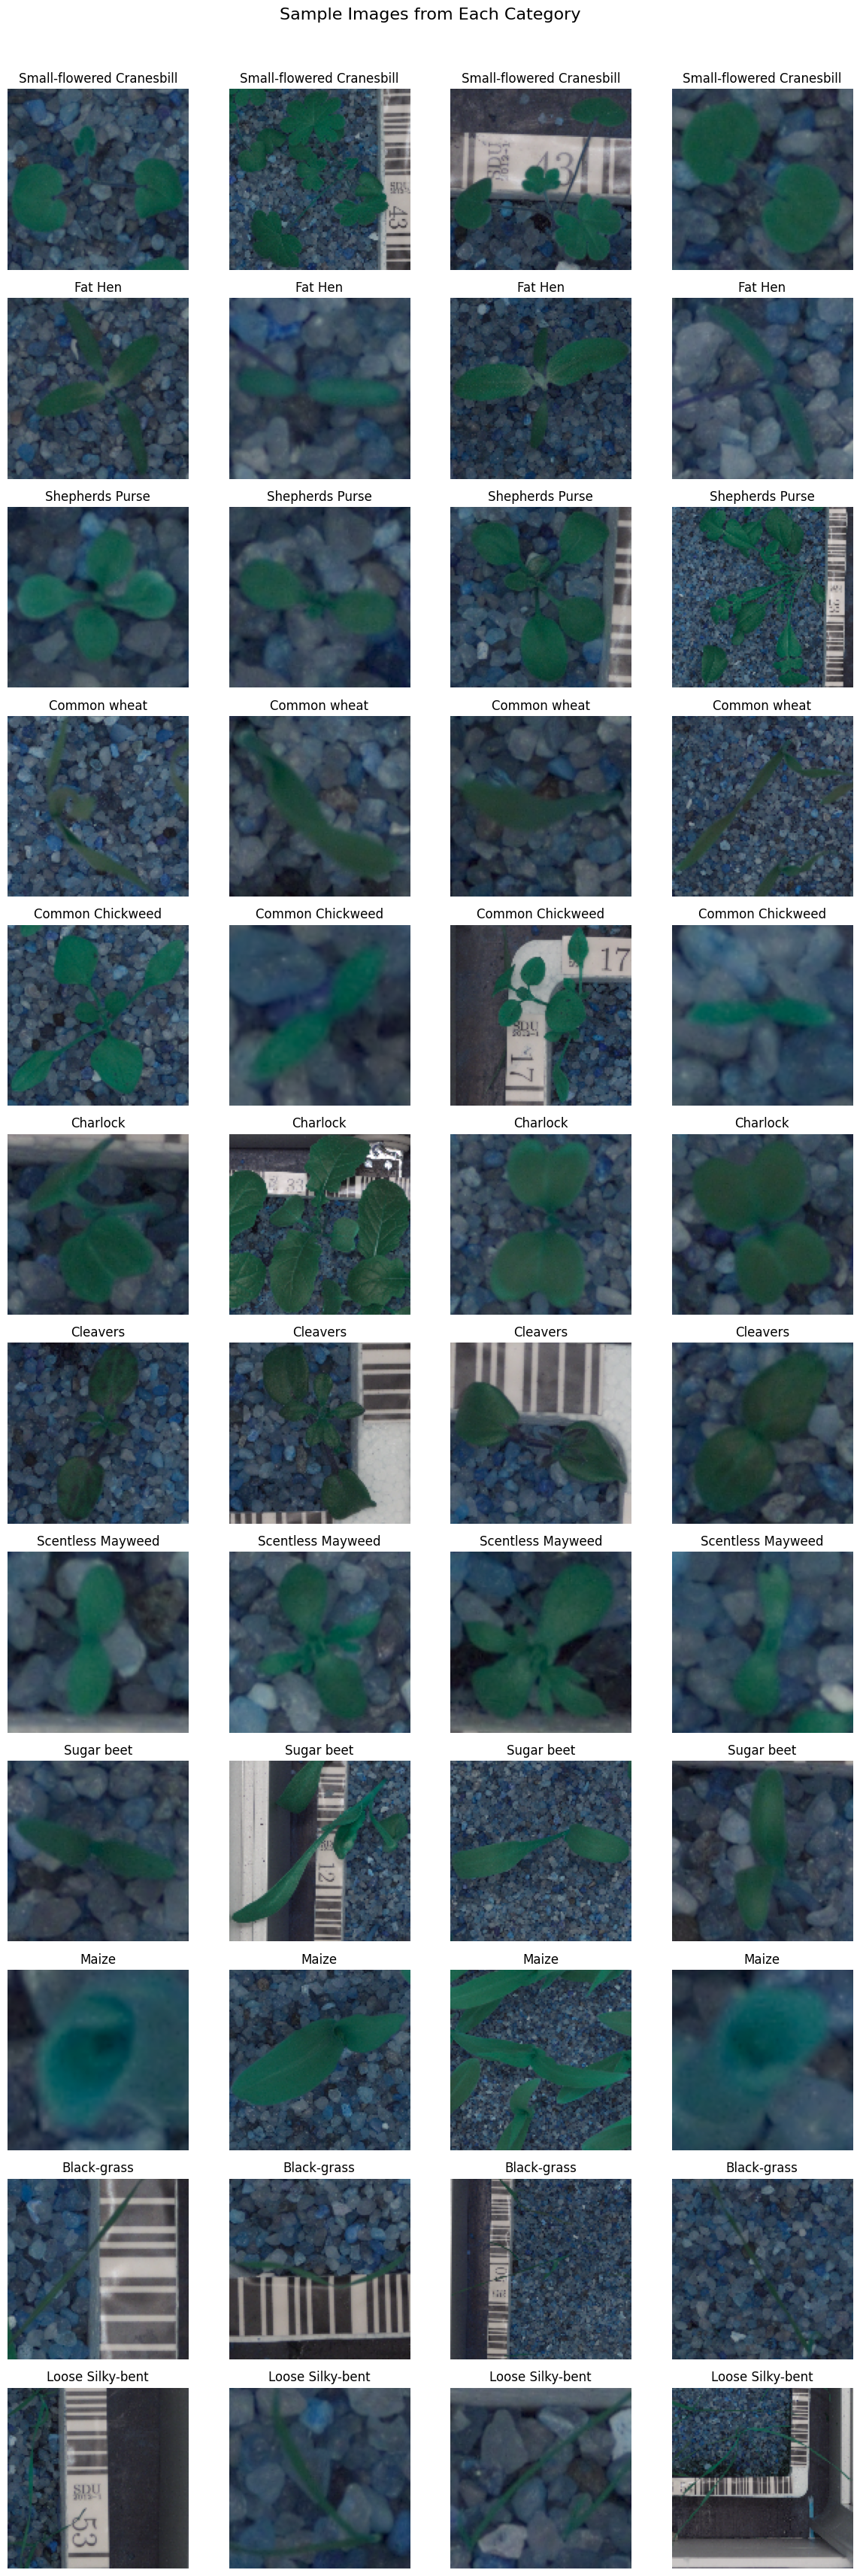

In [ ]:
# Visualize Sample from each category
# 'images' is our numpy array of images and 'labels' is the dataframe of labels
unique_labels = labels['Label'].unique()

# Display a few images from each category
fig, axes = plt.subplots(len(unique_labels), 4, figsize=(12, 3 * len(unique_labels)))  # Adjust the size as needed
fig.suptitle('Sample Images from Each Category', fontsize=16)

for i, label in enumerate(unique_labels):
    # Find images of this category
    indices = labels[labels['Label'] == label].index
    # Select a few indices randomly
    selected_indices = np.random.choice(indices, 4, replace=False)

    for j, idx in enumerate(selected_indices):
        ax = axes[i, j]
        ax.imshow(images[idx])
        ax.set_title(label, fontsize=12)
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust the layout
plt.show()


### Sample Images
The sample images provided display a variety of plant seedlings across 12 different species. These images exhibit diverse backgrounds, plant shapes, and colors. The visual inspection suggests that while some classes have distinct features, others may be more challenging to differentiate due to similarities in plant structure and coloration.


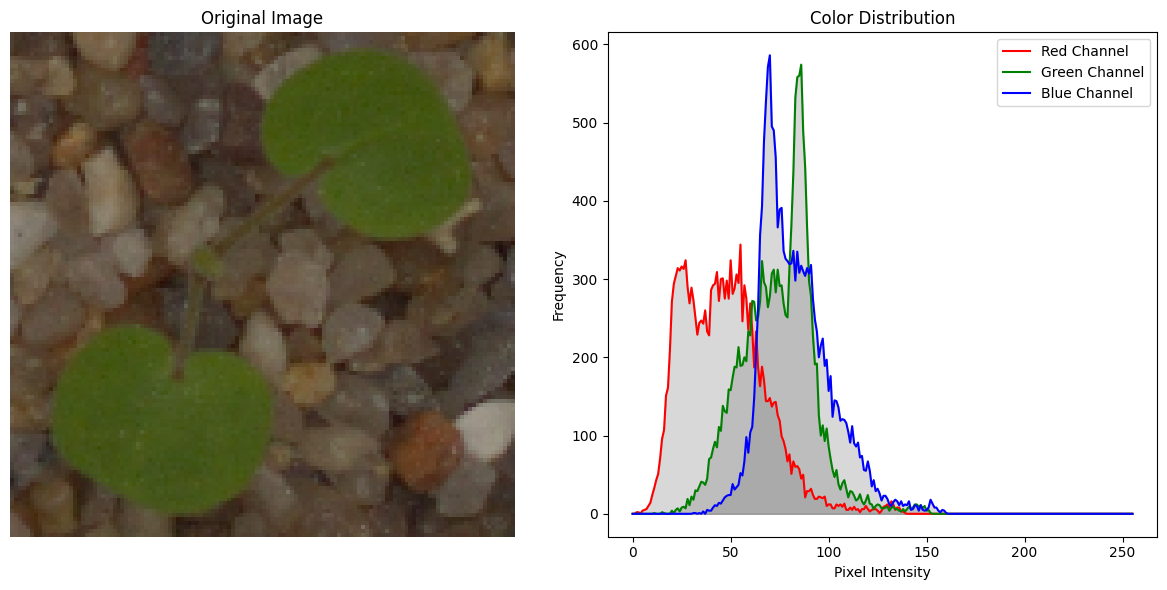

In [ ]:

# Select an image
img = images[100]

# Create a figure to host the image and its color histogram
plt.figure(figsize=(12, 6))

# Subplot for the image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title('Original Image')
plt.axis('off')  # Hide axis ticks and labels

# Subplot for the color distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot

# Plot color distribution for each channel
for i, color in enumerate(['Red', 'Green', 'Blue']):
    color_hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(color_hist, color=color[0].lower(), label=f'{color} Channel')
    plt.fill_between(np.arange(256), color_hist[:,0], color='gray', alpha=0.3)

plt.title('Color Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()  # Display legend to identify channels

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


The color distribution plot shows the frequency of pixel intensities for the Red, Green, and Blue channels of a sample image. The green channel peaks at a lower intensity, indicating a dominance of darker green tones, which is consistent with the vegetation present in the image.


1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

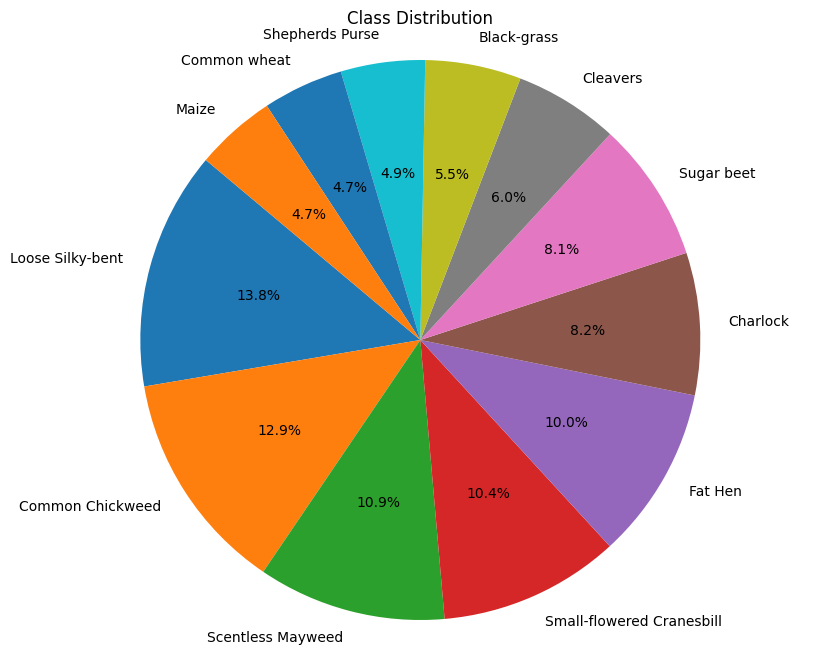

In [ ]:
# Pie chart for visualizing class distribution
plt.figure(figsize=(10, 8))
labels_count = labels['Label'].value_counts()
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution')
plt.show()


The pie chart illustrates the class distribution within the plant seedlings dataset, showing a moderate level of imbalance across the 12 categories. Loose Silky-bent and Common Chickweed are the most represented classes, while Maize and Common wheat have the smallest share,indicating imbalance in data.


In [ ]:
# Count the number of images per category
category_counts = labels['Label'].value_counts()
print(category_counts)


Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


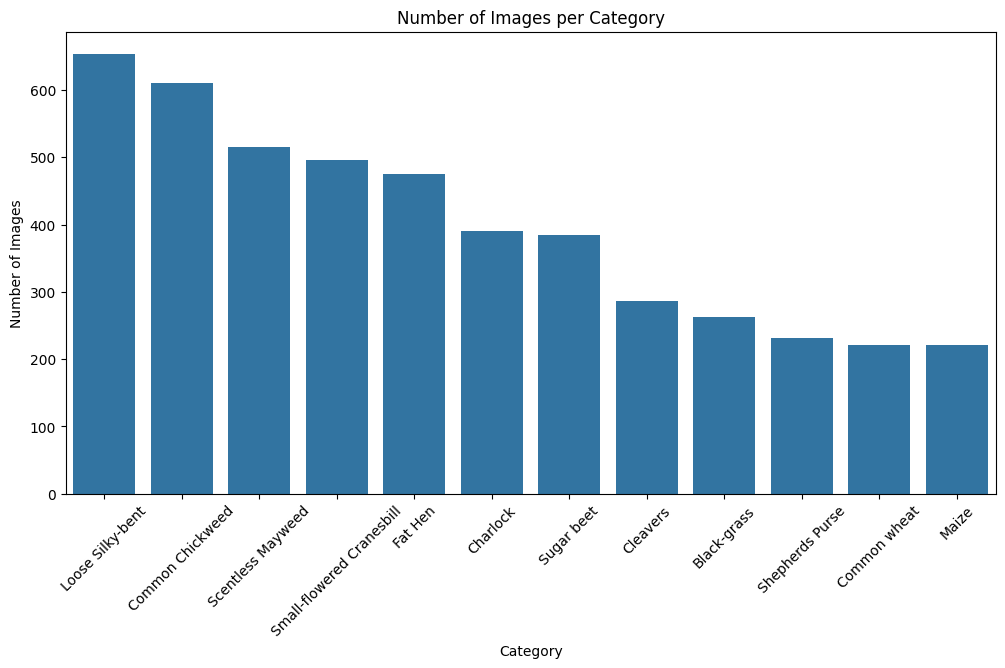

In [ ]:
# Plotting the distribution of categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()



### Dataset Statistics
The dataset consists of images belonging to 12 species with the following distribution:
- **Loose Silky-bent:** 654 images
- **Common Chickweed:** 611 images
- **Scentless Mayweed:** 516 images
- **Small-flowered Cranesbill:** 496 images
- **Fat Hen:** 475 images
- **Charlock:** 390 images
- **Sugar beet:** 385 images
- **Cleavers:** 287 images
- **Black-grass:** 263 images
- **Shepherds Purse:** 231 images
- **Common wheat:** 221 images
- **Maize:** 221 images

### Dataset Imbalance
The bar chart indicates a moderate imbalance in the dataset, with Loose Silky-bent and Common Chickweed being the most represented classes and Maize and Common wheat being the least. Such an imbalance may lead to biases in the classification model, favoring the majority classes over the minority ones.


## Data Pre-Processing

### Resize the images

In this project we will maintain the image size to 128 and not reduce it to 64

### Data Preparation for Modeling

### Data Preprocessing and Preparation Steps

1. **Image Preprocessing and Normalization**:
   - The preprocessing function converts images from BGR to RGB color space, ensuring the color channels are correctly ordered for subsequent analysis.
   - Images are kept at 128x128 pixels, maintaining a standard size for input into the neural network.
   - Pixel values are normalized by dividing by 255.0, scaling them to a [0, 1] range, which aids in the convergence of the model during training.

2. **Dataset Shuffling**:
   - The processed images are shuffled using randomly generated indices to ensure the model is exposed to various classes in an unbiased manner during training.

3. **Label Preparation**:
   - If the labels are provided in a Pandas DataFrame or Series, they are accessed using `.iloc[]` to ensure alignment with the shuffled images.
   - Labels are one-hot encoded, converting categorical labels into a binary matrix representation required for multi-class classification.

4. **Dataset Splitting with Stratification**:
   - The dataset is first split into training plus validation, and test sets, with 10% of the data reserved for testing. Stratification ensures the proportion of classes in each subset is consistent with the original dataset.
   - The training plus validation set is further divided into separate training and validation sets, with approximately 11.11% of the original data allocated for validation.
   - This stratified split procedure helps maintain an equal class distribution across training, validation, and test sets, which is crucial for training unbiased models.

By executing these steps, we ensure that the data is well-prepared for building and evaluating a robust convolutional neural network for image classification tasks.


In [ ]:
# Step 1 & 2: Preprocess and Normalize Images

def preprocess_images(images, target_size=(128, 128)):  #Maintain image size to 128
    processed_images = []
    for img in images:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img_resized = cv2.resize(img_rgb, target_size, interpolation=cv2.INTER_LINEAR)  # Resize image
        processed_images.append(img_resized)
    return np.array(processed_images) / 255.0  # Normalize images


# Apply preprocessing to images
images_processed = preprocess_images(images)

In [ ]:

# Check shapes after preprocessing
print("Shape of images_processed:", images_processed.shape)  # Should be (4750, 128, 128, 3)

# Step 3: Shuffle the Dataset (if needed)

# Shuffle the dataset
indices = np.arange(len(images_processed))
np.random.shuffle(indices)
images_processed = images_processed[indices]

# Use .iloc[] if 'labels' is a Pandas DataFrame or Series
if isinstance(labels, (pd.DataFrame, pd.Series)):
    labels_shuffled = labels.iloc[indices].values
else:
    # Use direct indexing if 'labels' is a numpy array
    labels_shuffled = labels[indices]

# Step 4: One-Hot Encode the Labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(labels_shuffled)

# Step 5: Split the dataset with stratification

# First split: Separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images_processed, y_encoded, test_size=0.1, stratify=y_encoded, random_state=42)

# Second split: Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=1/9, stratify=y_train_val, random_state=42)  # 1/9 is approximately 11.11%, which is 10% of the original data




Shape of images_processed: (4750, 128, 128, 3)


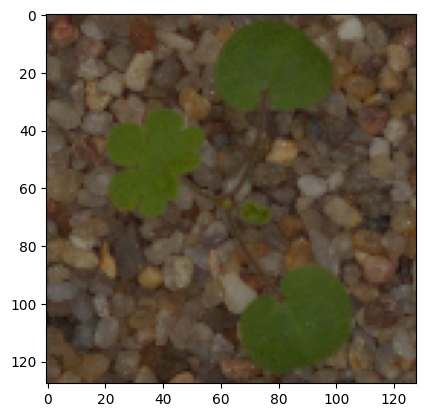

In [ ]:
# Step 1 & 2: Preprocess and Normalize Images

#images_processed = preprocess_images(images)
plt.imshow(images_processed[100])


In [ ]:
# Check the shapes of the arrays
print("Shape of images_processed:", images_processed.shape)
print("Shape of y_encoded:", y_encoded.shape)

Shape of images_processed: (4750, 128, 128, 3)
Shape of y_encoded: (4750, 12)


The preprocessed dataset contains 4750 images, each of 128x128 resolution with 3 color channels, and the corresponding one-hot encoded labels are represented in a matrix with 4750 rows and 12 columns, one for each plant category.


In [ ]:
# Print the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (3800, 128, 128, 3) (3800, 12)
Validation set shape: (475, 128, 128, 3) (475, 12)
Test set shape: (475, 128, 128, 3) (475, 12)


The training set consists of 3800 images and labels, the validation set includes 475 images and labels, and the test set also comprises 475 images and labels, all with the dimensions of 128x128x3 for images and 12 classes for the labels.


## Model Building

In [ ]:

def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


In [ ]:

def plot_confusion_matrix(model, X_test, y_test, label_binarizer):
    # Predict the values from the test dataset
    Y_pred = model.predict(X_test)
    # Convert predictions classes to one hot vectors
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    # Plotting
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_binarizer.classes_,
                yticklabels=label_binarizer.classes_)
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Model0

# Model building using Sequential API
model0 = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),



    Dense(12, activation='softmax')
])


model0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model0.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                        

Model0 is a convolutional neural network built using the Sequential API, consisting of four blocks of Conv2D and MaxPooling layers for feature extraction, followed by two Dense layers for classification, with BatchNormalization and Dropout applied to combat overfitting.


Model0 is trained for 60 epochs on the training set without data augmentation, using a batch size of 32 and also validated on a separate validation set.


In [ ]:

# Training the model without data augmentation
history_model0 = model0.fit(
    X_train, y_train,
    epochs=60,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=2
)

Epoch 1/60
119/119 - 5s - loss: 2.6264 - accuracy: 0.1892 - val_loss: 5.0044 - val_accuracy: 0.1095 - 5s/epoch - 43ms/step
Epoch 2/60
119/119 - 1s - loss: 1.9509 - accuracy: 0.3726 - val_loss: 3.8394 - val_accuracy: 0.0779 - 1s/epoch - 9ms/step
Epoch 3/60
119/119 - 1s - loss: 1.5917 - accuracy: 0.4868 - val_loss: 3.7865 - val_accuracy: 0.1368 - 1s/epoch - 9ms/step
Epoch 4/60
119/119 - 1s - loss: 1.3725 - accuracy: 0.5482 - val_loss: 4.1644 - val_accuracy: 0.1558 - 1s/epoch - 9ms/step
Epoch 5/60
119/119 - 1s - loss: 1.2011 - accuracy: 0.6034 - val_loss: 2.0674 - val_accuracy: 0.3495 - 1s/epoch - 9ms/step
Epoch 6/60
119/119 - 1s - loss: 1.0975 - accuracy: 0.6432 - val_loss: 1.3616 - val_accuracy: 0.5600 - 1s/epoch - 10ms/step
Epoch 7/60
119/119 - 1s - loss: 0.9409 - accuracy: 0.6974 - val_loss: 1.3804 - val_accuracy: 0.5158 - 1s/epoch - 10ms/step
Epoch 8/60
119/119 - 1s - loss: 0.8498 - accuracy: 0.7237 - val_loss: 1.1005 - val_accuracy: 0.6147 - 1s/epoch - 9ms/step
Epoch 9/60
119/119 - 

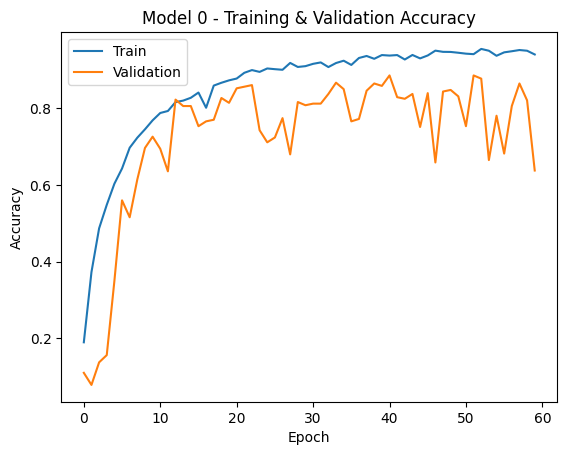

15/15 [==============================] - 0s 4ms/step


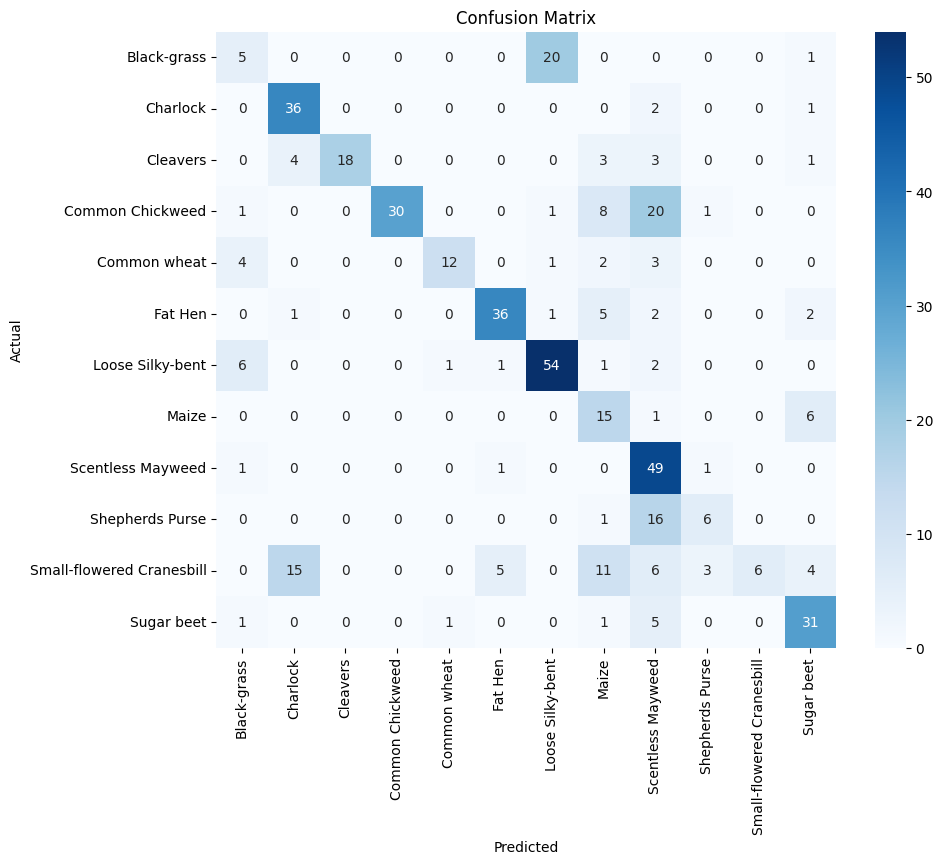

In [ ]:
# Plotting accuracy for Model 0
plot_accuracy(history_model0, 'Model 0 - Training & Validation Accuracy')

# Plotting confusion matrix for Model 0
plot_confusion_matrix(model0, X_test, y_test, lb)

- Model0's training accuracy shows a steady increase and plateaus around 80%, while the validation accuracy fluctuates around 70%, indicating potential overfitting or instability in the model's learning.
- There is a noticeable gap between training and validation accuracy, which suggests that the model could benefit from tuning or more varied training data.
- The confusion matrix for Model0 reveals that the model performs well on certain classes like 'Charlock' and 'Loose Silky-bent' but confuses between classes such as 'Small-flowered Cranesbill' and 'Common Chickweed'.
- The darker diagonal line in the confusion matrix shows correct predictions, but off-diagonal elements indicate misclassifications, with some classes like 'Black-grass' and 'Cleavers' having higher confusion, suggesting room for model improvement.


## Model Performance Improvement

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Model1 is a Sequential convolutional neural network featuring four convolutional layers with increasing filter complexity and two dense layers, incorporating BatchNormalization and Dropout to enhance performance and mitigate overfitting.


In [ ]:


# Model building using Sequential API
model1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),



    Dense(12, activation='softmax')
])


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                        

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


This code snippet defines a callback to reduce the learning rate when the validation accuracy plateaus.
- ReduceLROnPlateau monitors the validation accuracy (monitor='val_accuracy').
- If there is no improvement for 3 epochs (patience=3), it reduces the learning rate by a factor of 0.5 (factor=0.5).
- The learning rate will not be reduced below 0.00001 (min_lr=0.00001).


In [ ]:


# Training the model without data augmentation but with a callback to reduce the learning rate when the validation accuracy plateaus.
history_model1 = model1.fit(
    X_train, y_train,
    epochs=60,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[learning_rate_reduction],
    verbose=2
)


Epoch 1/60
119/119 - 7s - loss: 2.6678 - accuracy: 0.1837 - val_loss: 3.5176 - val_accuracy: 0.1158 - lr: 0.0010 - 7s/epoch - 55ms/step
Epoch 2/60
119/119 - 1s - loss: 1.9354 - accuracy: 0.3679 - val_loss: 3.5987 - val_accuracy: 0.1389 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 3/60
119/119 - 1s - loss: 1.6013 - accuracy: 0.4605 - val_loss: 4.8121 - val_accuracy: 0.1368 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 4/60
119/119 - 1s - loss: 1.3929 - accuracy: 0.5445 - val_loss: 4.1192 - val_accuracy: 0.1411 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 5/60
119/119 - 1s - loss: 1.2151 - accuracy: 0.6026 - val_loss: 1.5318 - val_accuracy: 0.4779 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 6/60
119/119 - 1s - loss: 1.0935 - accuracy: 0.6426 - val_loss: 0.7513 - val_accuracy: 0.7642 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 7/60
119/119 - 1s - loss: 0.9457 - accuracy: 0.6937 - val_loss: 3.2299 - val_accuracy: 0.2695 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 8/60
119/119 - 1s - loss: 0.8284 - accuracy: 0.7

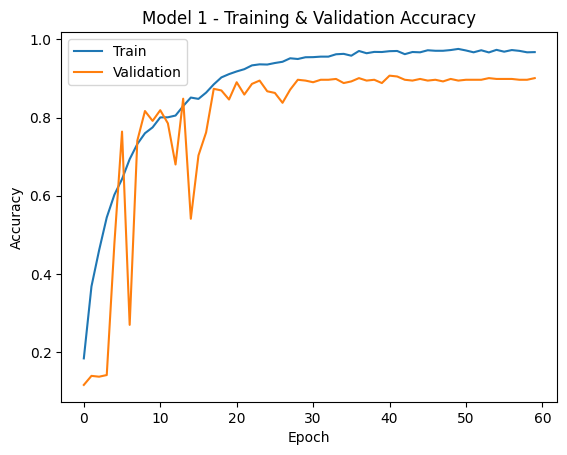

15/15 [==============================] - 0s 4ms/step


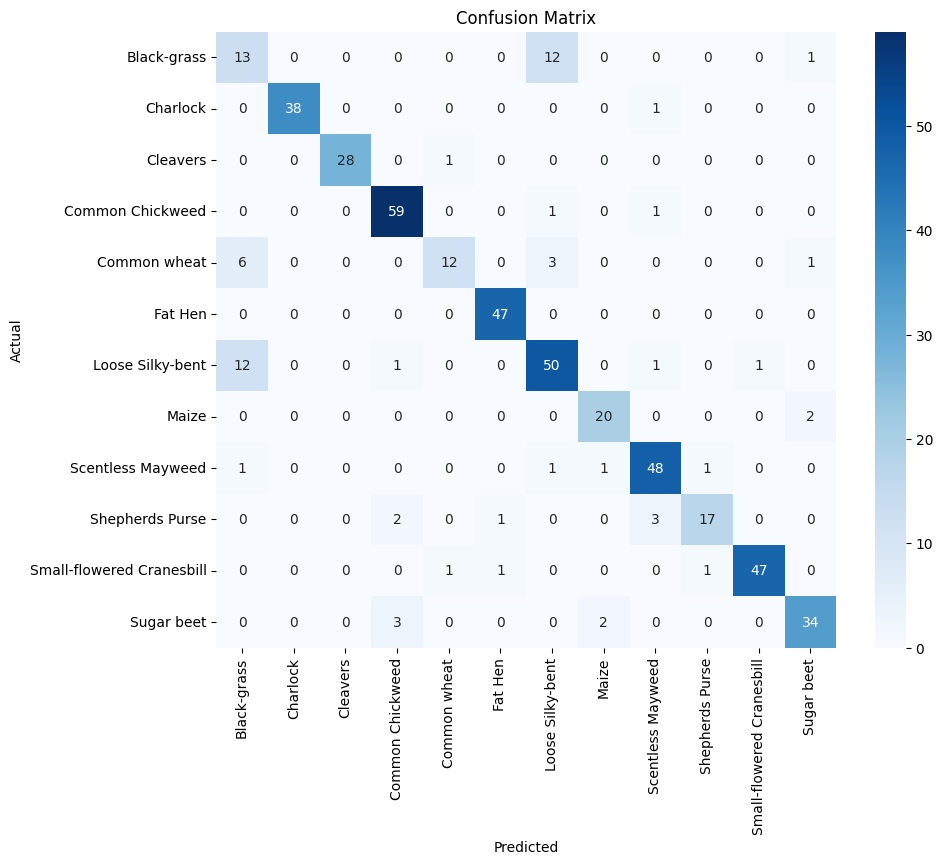

In [ ]:
# Plotting accuracy for Model 1
plot_accuracy(history_model1, 'Model 1 - Training & Validation Accuracy')

# Plotting confusion matrix for Model 1
plot_confusion_matrix(model1, X_test, y_test, lb)

- Model1 achieves a high training accuracy that stabilizes around 90%, and a validation accuracy that closely follows, indicating good generalization with minimal overfitting.
- The accuracy graph demonstrates a consistent trend in training and validation accuracy over 60 epochs, showing the model's reliable learning capability.
- The confusion matrix highlights the model's strength in accurately classifying categories like 'Charlock' and 'Fat Hen' but also reveals some confusion between classes such as 'Black-grass' and 'Loose Silky-bent'.
- The prominent diagonal in the confusion matrix indicates a strong true positive rate for most classes, with some misclassifications suggesting potential areas for model improvement.


### **Data Augmentation**


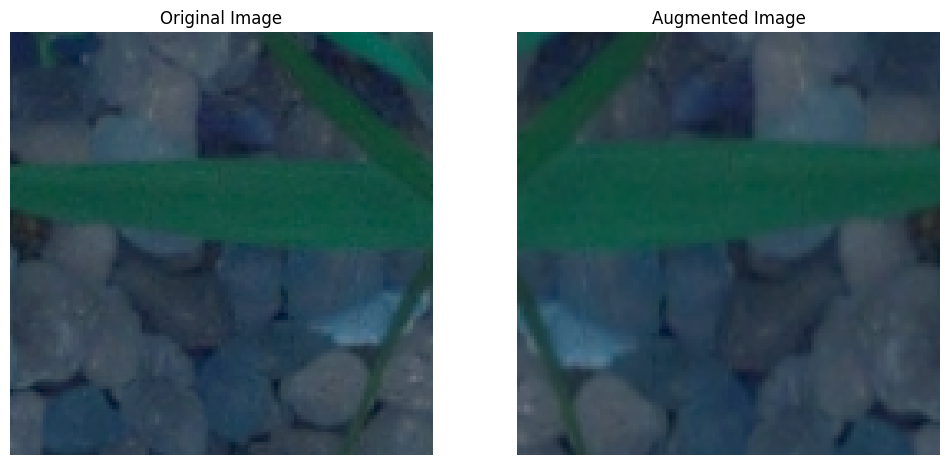

In [ ]:
# Display original and augmented image for comparison

aug = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
img_array = images[np.random.randint(images.shape[0])].reshape((1,) + images[0].shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_array[0])
ax[0].set_title('Original Image')
ax[0].axis('off')

# Generate and display an augmented image
for i, aug_img in enumerate(aug.flow(img_array, batch_size=1)):
    ax[1].imshow(aug_img[0].astype('uint8'))
    ax[1].set_title('Augmented Image')
    ax[1].axis('off')
    break


In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:


# Model building using Sequential API
model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),



    Dense(12, activation='softmax')
])


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Model2 is a deep convolutional neural network employing a sequence of Conv2D layers with increasing filter depth, BatchNormalization, MaxPooling2D for downsampling, and fully connected Dense layers, designed for a 12-class classification task.


In [ ]:
# Print the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                        

Data augmentation with zooming and horizontal flipping is applied to the training data, while the validation data is not augmented, ensuring model robustness and proper evaluation through generators during a 60-epoch training process.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation configuration for training data
train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation to the training data using the 'flow' method
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32  # Adjust batch size if needed
)

# For validation data, typically only rescaling is applied (which was already done in preprocessing)
validation_datagen = ImageDataGenerator()

# Since images are already rescaled, we just use the 'flow' method without any further augmentations
validation_generator = validation_datagen.flow(
    X_val, y_val,
    batch_size=32  # Adjust batch size if needed
)

# Fit the model using the data generators
history_model2 = model2.fit(
    train_generator,
    epochs=60,  # Adjust the number of epochs if needed
    callbacks=[learning_rate_reduction],
    validation_data=validation_generator,
    steps_per_epoch=len(X_train) // 32,  # Ensure this matches the batch size used above
    validation_steps=len(X_val) // 32,  # Ensure this matches the batch size used above
    verbose=2
)


Epoch 1/60
118/118 - 16s - loss: 2.5774 - accuracy: 0.1967 - val_loss: 2.5836 - val_accuracy: 0.1071 - lr: 0.0010 - 16s/epoch - 136ms/step
Epoch 2/60
118/118 - 12s - loss: 1.9269 - accuracy: 0.3755 - val_loss: 3.9148 - val_accuracy: 0.1295 - lr: 0.0010 - 12s/epoch - 105ms/step
Epoch 3/60
118/118 - 13s - loss: 1.6117 - accuracy: 0.4804 - val_loss: 4.7696 - val_accuracy: 0.1295 - lr: 0.0010 - 13s/epoch - 109ms/step
Epoch 4/60
118/118 - 13s - loss: 1.3747 - accuracy: 0.5520 - val_loss: 3.0845 - val_accuracy: 0.1696 - lr: 0.0010 - 13s/epoch - 107ms/step
Epoch 5/60
118/118 - 13s - loss: 1.3176 - accuracy: 0.5597 - val_loss: 1.5395 - val_accuracy: 0.4978 - lr: 0.0010 - 13s/epoch - 106ms/step
Epoch 6/60
118/118 - 13s - loss: 1.1473 - accuracy: 0.6274 - val_loss: 0.9948 - val_accuracy: 0.6987 - lr: 0.0010 - 13s/epoch - 107ms/step
Epoch 7/60
118/118 - 13s - loss: 1.0289 - accuracy: 0.6685 - val_loss: 1.4847 - val_accuracy: 0.5246 - lr: 0.0010 - 13s/epoch - 106ms/step
Epoch 8/60
118/118 - 13s - 

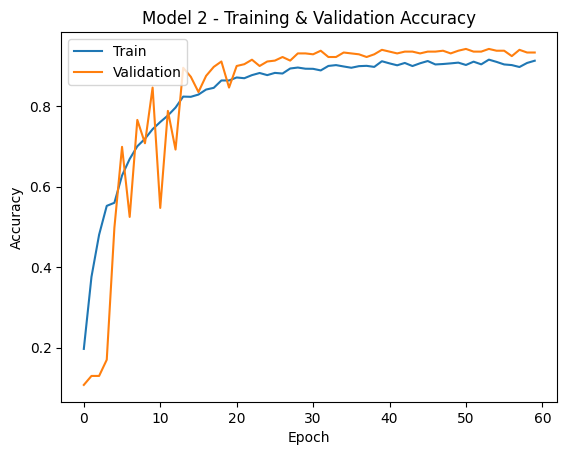

15/15 [==============================] - 0s 3ms/step


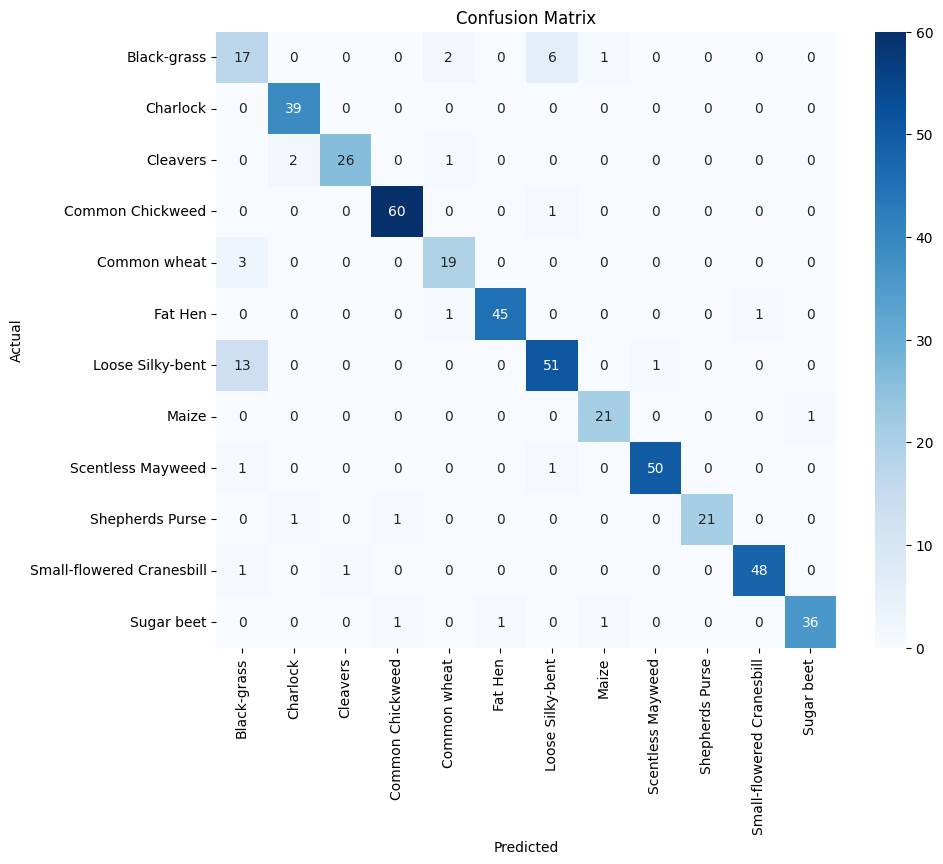

In [ ]:

# Plotting accuracy for Model 1
plot_accuracy(history_model2, 'Model 2 - Training & Validation Accuracy')

# Plotting confusion matrix for Model 1
plot_confusion_matrix(model2, X_test, y_test, lb)

- Model2's training and validation accuracy trends closely together throughout the 60 epochs, suggesting a consistent and stable learning pattern with excellent generalization capabilities.
- The training accuracy approaches 90%, and the validation accuracy remains slightly above 80%, indicating the model's robustness despite the complexity of the task.
- The confusion matrix for Model2 displays a strong diagonal, signifying high true positive rates for most classes, with standout performance for 'Charlock' and 'Common Chickweed'.
- Some confusion is observed for the 'Black-grass' and 'Loose Silky-bent' categories, where the model appears to struggle, implying a need for potential model refinement or additional training data for these classes.


## Final Model

In [ ]:

# 'history_model0', 'history_model1', and 'history_model2' are the history objects of the respective models

# Extract final accuracies
final_training_accuracies = [
    history_model0.history['accuracy'][-1],
    history_model1.history['accuracy'][-1],
    history_model2.history['accuracy'][-1]
]

final_validation_accuracies = [
    history_model0.history['val_accuracy'][-1],
    history_model1.history['val_accuracy'][-1],
    history_model2.history['val_accuracy'][-1]
]

# Calculate z-scores for accuracies
z_scores_training = zscore(final_training_accuracies)
z_scores_validation = zscore(final_validation_accuracies)

# Create a dictionary to hold the data
performance_data = {
    'Model': ['Model0', 'Model1', 'Model2'],
    'Final Training Accuracy': final_training_accuracies,
    'Final Validation Accuracy': final_validation_accuracies,
    'Z-Score Training Accuracy': z_scores_training,
    'Z-Score Validation Accuracy': z_scores_validation,
    'Final Training Loss': [
        history_model0.history['loss'][-1],
        history_model1.history['loss'][-1],
        history_model2.history['loss'][-1]
    ],
    'Final Validation Loss': [
        history_model0.history['val_loss'][-1],
        history_model1.history['val_loss'][-1],
        history_model2.history['val_loss'][-1]
    ]
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(performance_data)

# Display the table

performance_df.head()

Model  Final Training Accuracy  Final Validation Accuracy  \
0  Model0                 0.941053                   0.637895   
1  Model1                 0.967632                   0.901053   
2  Model2                 0.912686                   0.933036   

   Z-Score Training Accuracy  Z-Score Validation Accuracy  \
0                   0.026564                    -1.407303   
1                   1.211247                     0.582722   
2                  -1.237811                     0.824581   

   Final Training Loss  Final Validation Loss  
0             0.167808               1.893127  
1             0.112044               0.360029  
2             0.285441               0.246768

## Model Performance Summary

To determine the best model from the provided data, we consider several key factors: Final Training and Validation Accuracy, Z-Scores for these accuracies, and Final Training and Validation Loss.

### Analysis

- **Final Training Accuracy**: Model1 has the highest training accuracy (96.76%), indicating it has learned the training data well. However, high training accuracy alone doesn't guarantee a good model if it doesn't generalize well to unseen data.
  
- **Final Validation Accuracy**: Model2 has the highest validation accuracy (93.30%), indicating it performs best on unseen data among the three models. This metric is crucial as it gives us a good indication of how well the model generalizes.

- **Z-Score Training and Validation Accuracy**: Z-Scores provide a measure of how far off a data point is from the mean in terms of standard deviations. Model1 and Model2 have positive Z-Scores for validation accuracy, with Model2 having the highest, suggesting it's performing above average in terms of validation accuracy compared to the three models.

- **Final Training and Validation Loss**: Model2 also has the lowest validation loss (0.246768), further supporting its ability to generalize well. Lower validation loss is indicative of better performance on unseen data.

### Conclusion

Based on the provided metrics, **Model2** appears to be the best model. It not only has the highest validation accuracy but also the lowest validation loss, suggesting it has the best generalization capability among the three models. It's also worth noting that Model2's training accuracy is slightly lower than Model1, which might indicate that it's less overfit to the training data compared to Model1, making it a more robust model for new, unseen data.

While Model1 shows excellent training performance, its relatively lower validation accuracy and higher validation loss compared to Model2 suggest it might be overfitting to the training data, making Model2 a preferable choice for generalization. Model0, despite its acceptable training accuracy, falls short significantly in validation accuracy and has the highest validation loss, indicating it's likely overfitting and not generalizing well to new data.

Therefore, in practical applications, **Model2** would likely serve as the most reliable model for making predictions on new data, given its balance of good training performance and superior validation performance.


Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

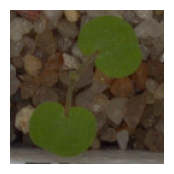

1/1 [==============================] - 0s 24ms/step
Predicted Label: Small-flowered Cranesbill
True Label: Small-flowered Cranesbill


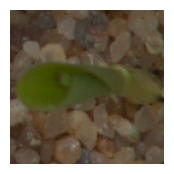

1/1 [==============================] - 0s 21ms/step
Predicted Label: Maize
True Label: Maize


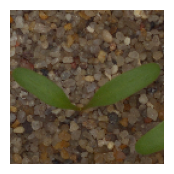

1/1 [==============================] - 0s 20ms/step
Predicted Label: Sugar beet
True Label: Sugar beet


In [ ]:
def display_image_prediction(index, model, X_test, y_test_encoded, encoder):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[index])
    plt.axis('off')
    plt.show()

    # Predict the label of the image at the given index
    predicted_probs = model.predict(X_test[index].reshape(1, 128, 128, 3))
    predicted_index = np.argmax(predicted_probs, axis=1)
    # Inverse transform the predicted index using the encoder (LabelBinarizer here)
    predicted_label = encoder.inverse_transform(predicted_probs)[0]  # Adjusting for the output of LabelBinarizer

    # Inverse transform the true label from one-hot encoded vector
    true_label_index = np.argmax(y_test_encoded[index])
    true_label = encoder.classes_[true_label_index]  # Directly accessing the classes_ attribute

    print(f'Predicted Label: {predicted_label}')
    print(f'True Label: {true_label}')

# Display predictions for three random images
for _ in range(3):
    index = np.random.randint(0, len(X_test))  # Randomly select an index
    display_image_prediction(index, model2, X_test, y_test, lb)



The model has demonstrated precise predictive performance, correctly identifying the species of various plant seedlings such as Small-flowered Cranesbill, Maize, and Sugar beet.


## Actionable Insights and Business Recommendations

- **Model Optimization**: Continue refining the convolutional neural network models to address misclassifications, particularly between similar-looking plant species like 'Black-grass' and 'Loose Silky-bent'.

- **Data Augmentation**: Implement further data augmentation strategies to combat overfitting and improve model generalization, particularly for underrepresented classes in the dataset.

- **Class Balancing**: Address the class imbalance either through data augmentation for minority classes or by using class weights during model training to ensure equal representation and learning.

- **Transfer Learning**: Explore transfer learning with pre-trained models that have been successful in similar domains to leverage learned features and potentially improve accuracy.

- **Manual Review Workflow**: Establish a workflow where predictions with low confidence scores are flagged for manual review, thus ensuring high accuracy in critical classifications.

- **Continuous Model Training**: Set up a system for continuous learning where the model is periodically updated with new data, keeping the classifier current with any changes in plant seedling appearances over time.

- **Deployment Strategy**: Deploy the model in a user-friendly application to assist agricultural workers in quickly identifying plant seedlings, which will significantly reduce manual labor and improve crop management.

- **Monitoring and Evaluation**: After deployment, continuously monitor the model's performance and collect feedback for ongoing improvements, ensuring the AI system remains a reliable tool for the agricultural industry.


_____